In [1]:
import Bio.Seq
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

gene_names = ['Thermus thermophilus', 'Geobacillus stearothermophilus', 'Streptococcus pneumoniae', 'Escherichia coli', 'Aliarcobacter butzleri', 'Shewanella baltica']

DNA_1 = SeqIO.read('./NC_006461_1.fna', "fasta") # polA DNA polymerase I [ Thermus thermophilus HB8 ]
DNA_2 = SeqIO.read('./NZ_JALS01000016_1.fna', "fasta") # polA DNA Polymerase I[Geobacillus stearothermophilus]
DNA_3 = SeqIO.read('./NZ_CP020549_1.fna', "fasta") # polA DNA polymerase I [ Streptococcus pneumoniae ]
DNA_4 = SeqIO.read('./NC_000913_3.fna', "fasta") # polA DNA polymerase I [ Escherichia coli str. K-12 substr. MG1655 ]
DNA_5 = SeqIO.read('./NC_017187_1.fna', "fasta") # polA DNA polymerase I [ Aliarcobacter butzleri ED-1 ]
DNA_6 = SeqIO.read('./NC_016901_1.fna', "fasta") # polA DNA polymerase I [ Shewanella baltica OS678 ]
DNAs = [DNA_1, DNA_2, DNA_3, DNA_4, DNA_5, DNA_6]
DNAs

[SeqRecord(seq=Seq('ATGGAGGCGATGCTTCCGCTCTTTGAACCCAAAGGCCGGGTCCTCCTGGTGGAC...TAG'), id='NC_006461.1:996840-999344', name='NC_006461.1:996840-999344', description='NC_006461.1:996840-999344 Thermus thermophilus HB8 chromosome 1, complete sequence', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGATGTTGAAAAACAAGCTCGTCTTAATTGACGGCAACAGCGTGGCGTACCGC...TAA'), id='NZ_JALS01000016.1:c4831-2195', name='NZ_JALS01000016.1:c4831-2195', description='NZ_JALS01000016.1:c4831-2195 Geobacillus stearothermophilus ATCC 7953 GBScontig0000008_4, whole genome shotgun sequence', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGATAAGAAAAAATTATTATTGATTGATGGGTCTTCTGTAGCTTTTCGGGCG...TAA'), id='NZ_CP020549.1:63072-65705', name='NZ_CP020549.1:63072-65705', description='NZ_CP020549.1:63072-65705 polA [organism=Streptococcus pneumoniae] [GeneID=66805238] [chromosome=]', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGTTCAGATCCCCCAAAATCCACTTATCCTTGTAGATGGTTCATCTTATCTT...TAA'), id='NC_000913.3:4046966-4049752', name='NC_000913.3:4046966-4049752', desc

In [2]:
gc_contents = []
mRNAs = []
AAs = []


for DNA in DNAs:
    gc_contents.append(gc_fraction(DNA)*100)
    mRNA = DNA.seq.transcribe()
    AA = mRNA.translate()
    AAs.append(AA)

gc_contents

[67.86427145708582,
 55.2901023890785,
 44.00151860288535,
 51.955507714388226,
 25.863991081382387,
 49.168474331164134]

In [3]:
from prettytable import PrettyTable
from prettytable import ALL

table = PrettyTable()

# Đặt tên cho các cột
table.field_names = ["no.", "Species", "length", "gc-content", "Sequence Length(amino acids)"]
table.align["Species"] = "l"

table.hrules = ALL

table.add_row(["", "*Thermophilic*", "", round((gc_contents[0] + gc_contents[1])/2, 2), ""])
table.add_row([1, gene_names[0], len(DNA_1), round(gc_contents[0], 2), len(AAs[0])])
table.add_row([2, gene_names[1], len(DNA_2), round(gc_contents[1], 2), len(AAs[1])])

table.add_row(["", "*Mesophilic*", "", round((gc_contents[2] + gc_contents[3])/2, 2), ""])
table.add_row([3, gene_names[2], len(DNA_3), round(gc_contents[2], 2), len(AAs[2])])
table.add_row([4, gene_names[3], len(DNA_4), round(gc_contents[3], 2), len(AAs[3])])

table.add_row(["", "*Psychrophilic*", "", round((gc_contents[4] + gc_contents[5])/2, 2), ""])
table.add_row([1, gene_names[4], len(DNA_5), round(gc_contents[4], 2), len(AAs[4])])
table.add_row([1, gene_names[5], len(DNA_6), round(gc_contents[5], 2), len(AAs[5])])

print(table)

+-----+--------------------------------+--------+------------+------------------------------+
| no. | Species                        | length | gc-content | Sequence Length(amino acids) |
+-----+--------------------------------+--------+------------+------------------------------+
|     | *Thermophilic*                 |        |   61.58    |                              |
+-----+--------------------------------+--------+------------+------------------------------+
|  1  | Thermus thermophilus           |  2505  |   67.86    |             835              |
+-----+--------------------------------+--------+------------+------------------------------+
|  2  | Geobacillus stearothermophilus |  2637  |   55.29    |             879              |
+-----+--------------------------------+--------+------------+------------------------------+
|     | *Mesophilic*                   |        |   47.98    |                              |
+-----+--------------------------------+--------+-----------

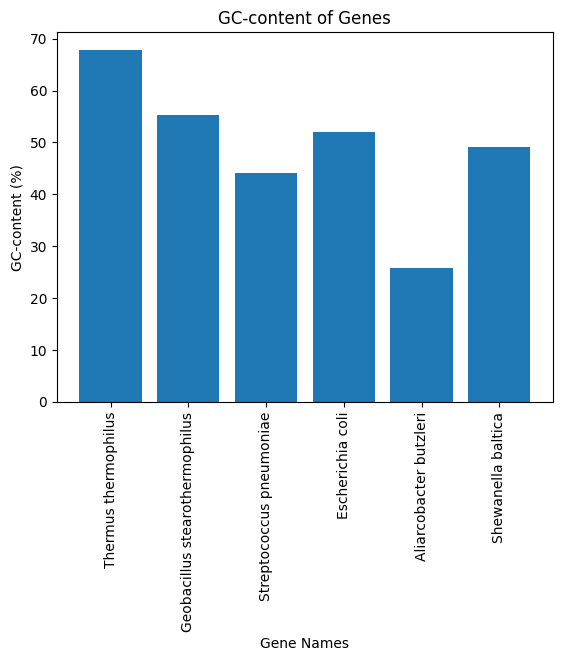

In [4]:
import matplotlib.pyplot as plt

plt.bar(gene_names, gc_contents)

plt.xlabel("Gene Names")
plt.ylabel("GC-content (%)")
plt.xticks(range(len(gene_names)), gene_names, rotation='vertical')
plt.title("GC-content of Genes")

plt.show()

In [5]:
import pandas as pd
from Bio.SeqUtils import ProtParam
from Bio.SeqUtils import IUPACData

list_ = []
aa_alphabets = IUPACData.protein_letters
for a in range(6):
    X = ProtParam.ProteinAnalysis(AAs[a])
    for i in range(len(aa_alphabets)):
        content = round(X.get_amino_acids_percent()[aa_alphabets[i]] * 100, 2)
        aa = [content, gene_names[a], IUPACData.protein_letters_1to3[aa_alphabets[i]]]
        list_.append(aa)
        
list_
df = pd.DataFrame(list_, columns=['Content (%)', 'Species', 'Amino Acid'])
df

,Content (%),Species,Amino Acid
0,10.78,Thermus thermophilus,Ala
1,0.12,Thermus thermophilus,Cys
2,4.79,Thermus thermophilus,Asp
3,10.18,Thermus thermophilus,Glu
4,3.47,Thermus thermophilus,Phe
...,...,...,...
115,4.34,Shewanella baltica,Ser
116,6.29,Shewanella baltica,Thr
117,5.31,Shewanella baltica,Val
118,0.65,Shewanella baltica,Trp


In [6]:
import altair as alt
from altair import datum

gp_chart = alt.Chart(df).mark_bar().encode(
    alt.X('Content (%)'),
    alt.Y('Species', axis=alt.Axis(grid=True)), 
    alt.Color('Species'),
    alt.Row('Amino Acid')
)

gp_chart

alt.Chart(...)